# ***Project:*** Traffic Signs Detection and Recognition

## ***Memebers:***
*   Ahmed Emad
*   Abdelrahman Mostafa Abdo El-Sayed
*   Mohamed Ashraf Abdel-Maqsoud
*   Mahmoud Mohamed Mahmoud
*   Abdulrahman Mostafa Hassan

## ***Supervisor:***
*   Mahmoud Talaat Mahmoud

## ***Track:*** Microsoft Machine Learning

## ***Group:*** Microsoft ML Engineer (CAI1_AIS5_S4e) - 3004

In [ ]:
!pip install ultralytics -q

In [ ]:
import os
import zipfile
import yaml
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import albumentations as A
import cv2
import random
import shutil
from collections import Counter
import hashlib
from ultralytics import YOLO

# ***Mount Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Unzip Dataset***

In [ ]:
zip_file_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/archive.zip'
extract_to = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f'Extracted all files to {extract_to}')

Extracted all files to /content/drive/MyDrive/Datasets/Dataset of Graduation Project


# ***Paths***

In [ ]:
# Define Paths:

# Train:
train_images_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/images'
train_labels_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/labels'

# Valid:
val_images_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/valid/images'
val_labels_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/valid/labels'

# Test:
test_images_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/test/images'
test_labels_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/test/labels'

# yaml:
yaml_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/data.yaml'

# ***Explore Datasets***



#### **Function 1: `class_names(yaml_path)`**
This function extracts the class names from a YAML file and assigns an ID to each class.

- **Parameters:**
  - `yaml_path`: The file path to the YAML file that contains the class names.

- **Returns:**
  - A dictionary where the key is the class ID (an integer), and the value is the class name (a string).

- **Usage Example:**
  ```python
  classes = class_names('path/to/classes.yaml')


In [ ]:
# Function_1: get IDs and names of each class
def class_names(yaml_path):
    with open(yaml_path, 'r') as file:
        data = yaml.safe_load(file)
    return {idx: name for idx, name in enumerate(data['names'])}

**IDs and Names**

In [ ]:
classes = class_names(yaml_path)
classes

{0: 'Green Light',
 1: 'Red Light',
 2: 'Speed Limit 100',
 3: 'Speed Limit 110',
 4: 'Speed Limit 120',
 5: 'Speed Limit 20',
 6: 'Speed Limit 30',
 7: 'Speed Limit 40',
 8: 'Speed Limit 50',
 9: 'Speed Limit 60',
 10: 'Speed Limit 70',
 11: 'Speed Limit 80',
 12: 'Speed Limit 90',
 13: 'Stop'}

### **Function 2: `count_class_instances_in_dataset(labels_path, num_classes=14)`**

This function counts the number of instances for each class in a dataset by reading label files that contain class IDs.

- **Parameters:**
  - `labels_path`: The directory path containing the label files (in `.txt` format).
  - `num_classes`: The total number of possible classes (default is 14).

- **Returns:**
  - A dictionary where the keys are class IDs and the values are the counts of instances for each class.

- **Example Usage:**
  ```python
  train_instances = count_class_instances_in_dataset('path/to/train_labels')


In [ ]:
# Function_2: count number of each class
def count_class_instances_in_dataset(labels_path, num_classes=14):
    class_count = {i: 0 for i in range(num_classes)}
    for label_file in os.listdir(labels_path):
        if label_file.endswith('.txt'):
            file_path = os.path.join(labels_path, label_file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    class_id = int(line.split()[0])
                    if 0 <= class_id < num_classes:
                        class_count[class_id] += 1
    return class_count

### **Function 3: `plot_class_distribution(instances, title, classes=classes)`**

This function visualizes the distribution of class instances in a dataset using a bar chart, where each bar represents the number of instances for a specific class.

- **Parameters:**
  - `instances`: A dictionary containing the count of instances per class. Typically, the output of `count_class_instances_in_dataset()`.
  - `title`: A string representing the title of the plot.
  - `classes`: A dictionary mapping class IDs to class names. The default value is the output of the `class_names()` function.

- **Example Usage:**
  ```python
  plot_class_distribution(train_instances, 'Train Classes Distribution')


In [ ]:
# Function_3: Plot data
def plot_class_distribution(instances,title, classes=classes):
    x_labels = [f"{classes[i]} ({i})" for i in instances.keys()]
    counts = list(instances.values())
    colors = sns.color_palette('husl', len(instances))

    plt.figure(figsize=(10, 6))
    plt.bar(x_labels, counts, color=colors)

    plt.xticks(rotation=45, ha='right')

    plt.xlabel('Class Name (ID)')
    plt.ylabel('Instance Count')
    plt.title(title)

    plt.tight_layout()
    plt.show()

**Train Data**

In [ ]:
train_instances = count_class_instances_in_dataset(train_labels_path)
train_instances

{0: 542,
 1: 585,
 2: 267,
 3: 101,
 4: 252,
 5: 275,
 6: 334,
 7: 235,
 8: 283,
 9: 301,
 10: 318,
 11: 323,
 12: 168,
 13: 285}

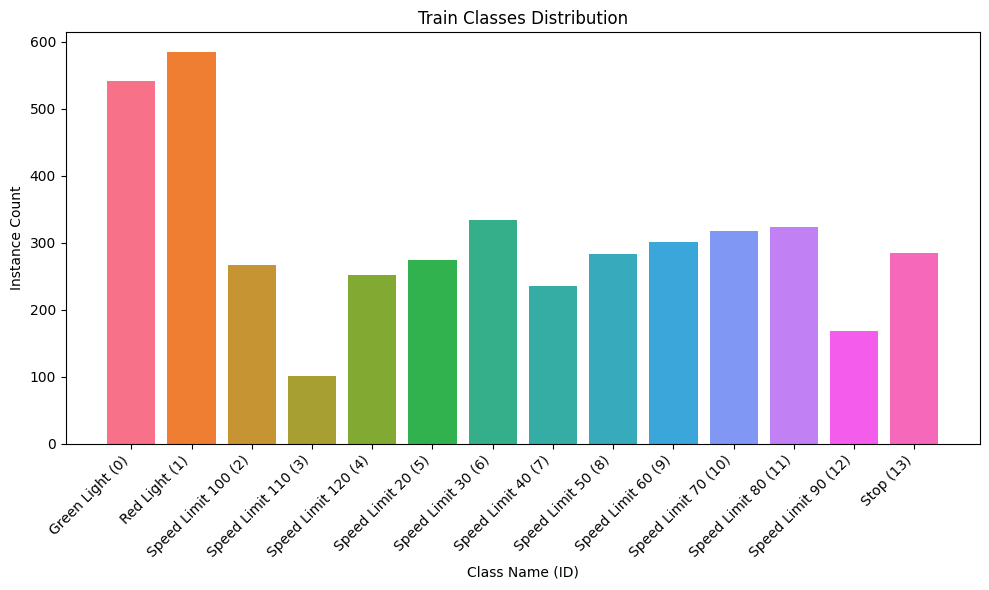

In [ ]:
plot_class_distribution(train_instances,'Train Classes Distribution')

**Validation Data**

In [ ]:
val_instances = count_class_instances_in_dataset(val_labels_path)
val_instances

{0: 122,
 1: 108,
 2: 52,
 3: 17,
 4: 60,
 5: 56,
 6: 74,
 7: 55,
 8: 71,
 9: 76,
 10: 78,
 11: 56,
 12: 38,
 13: 81}

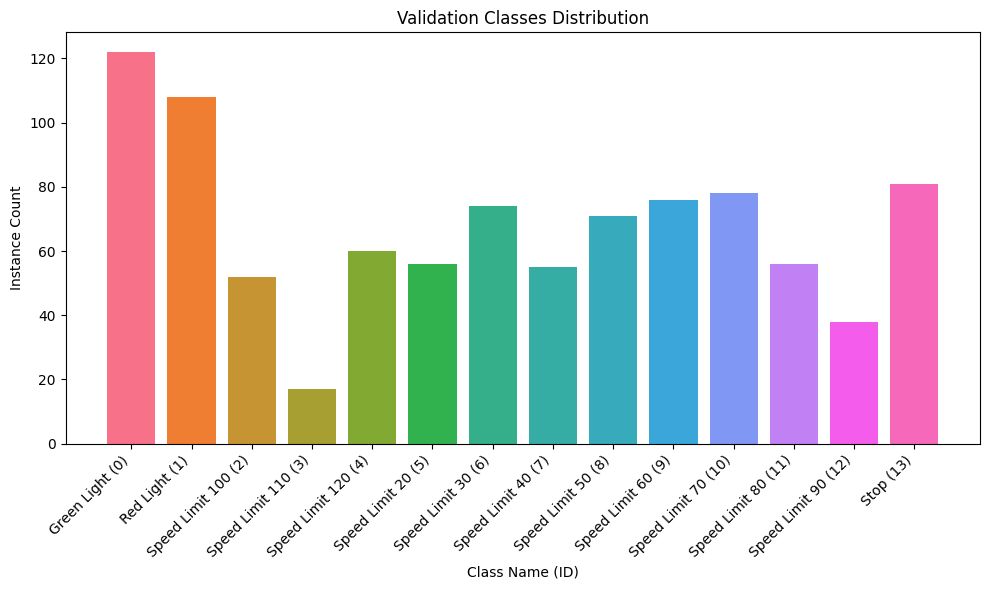

In [ ]:
plot_class_distribution(val_instances,'Validation Classes Distribution')

**Test Data**

In [ ]:
test_instances = count_class_instances_in_dataset(test_labels_path)
test_instances

{0: 110,
 1: 94,
 2: 46,
 3: 21,
 4: 44,
 5: 45,
 6: 60,
 7: 53,
 8: 50,
 9: 45,
 10: 53,
 11: 61,
 12: 34,
 13: 50}

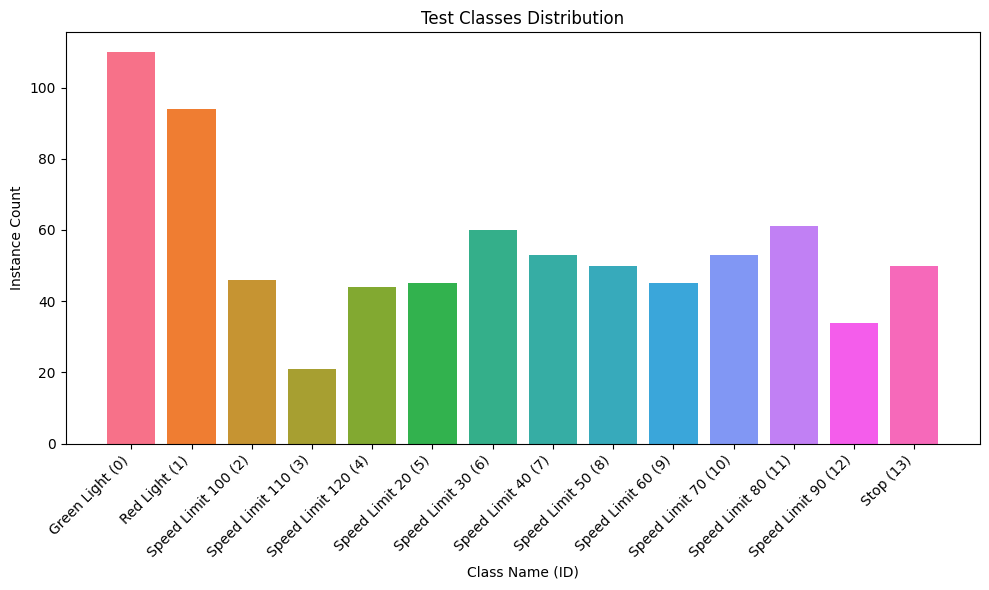

In [ ]:
plot_class_distribution(test_instances,'Test Classes Distribution')

### **Visualizing Images in a Folder**

This section of the code displays images from a specified folder in a grid layout using `matplotlib`. Each image is shown with its file name as the title, and the grid layout is dynamically adjusted based on the number of images.

- **Variables:**
  - `folder_path`: The path to the folder containing the images.
  - `image_files`: A sorted list of image file names, ordered by the numeric part of the file name.

- **Plot Layout:**
  - The number of rows is calculated based on the total number of images and the number of columns (fixed at 5).
  - The images are displayed in a grid layout using subplots, where each subplot shows one image with its corresponding title (the image name).

- **Explanation:**
  - The `Image.open()` function is used to load each image from the folder.
  - Each image is displayed in a subplot, and the axes are turned off to provide a clean presentation.
  - If the number of images is less than the total number of subplots, the remaining subplots are hidden.
  - The `plt.tight_layout()` ensures that the layout is neatly adjusted, avoiding overlaps between images and titles.

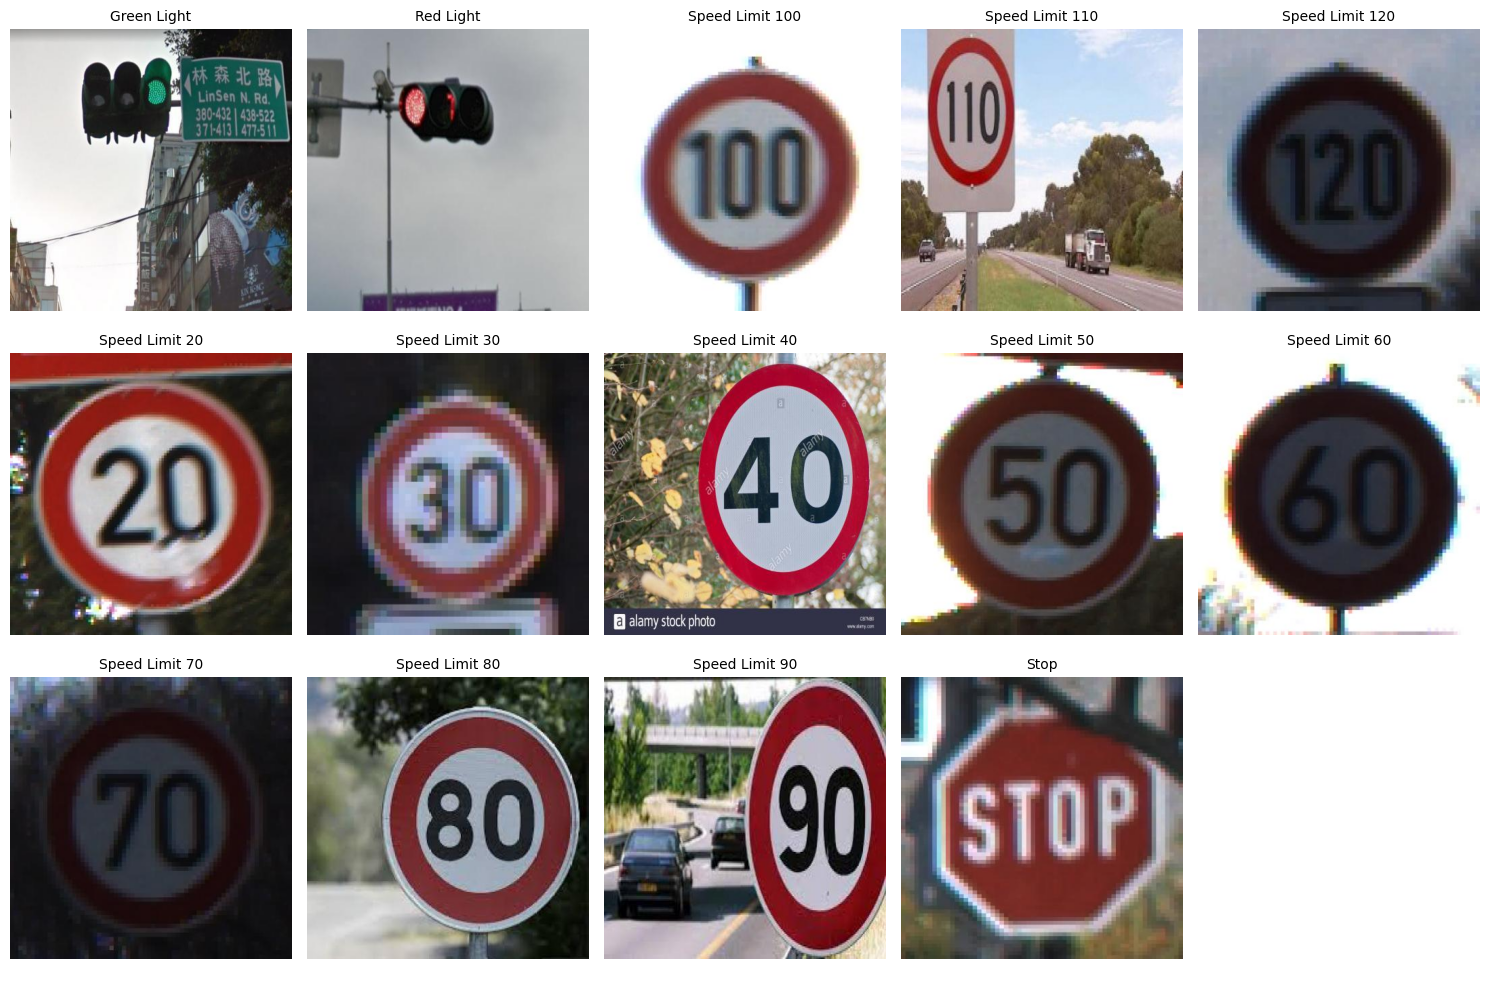

In [ ]:
# Show path
folder_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/Show'

image_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split()[-1].split('.')[0]))
num_images = len(image_files)

cols = 5
rows = (num_images // cols) + 1 if num_images % cols != 0 else num_images // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
axs = axs.ravel()

for i, image_file in enumerate(image_files):
    img_path = os.path.join(folder_path, image_file)
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    image_name = ' '.join(image_file.split()[:-1])
    axs[i].set_title(image_name, fontsize=10)

for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# ***Data Augmentation***

### **Internal Documentation for Augmentation and Class Processing Code**

This code performs image augmentation and processes class instances in a dataset to ensure a balanced distribution of images for each class. It uses various augmentation techniques and updates the dataset with the augmented images and their corresponding labels.

---

### **Paths for Augmented Files**

The augmented images and their labels are stored in the following paths:


In [ ]:
# Paths of augmented files
augmented_images_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/augmented images'
augmented_labels_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/augmented labels'

### **Augmentation Transformations**

The `transform` variable defines a set of image augmentation techniques using the `albumentations` library. These transformations are applied to the images and their corresponding bounding boxes to increase the diversity of the training dataset. Below are the details of each transformation included in the composition:

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(scale_limit=0.2, rotate_limit=45, shift_limit=0.2, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, p=0.5),  # Add fog effect
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=3, p=0.5),  # Add shadows
    A.RandomScale(scale_limit=0.2, p=0.5),  # Add random scaling
    A.ImageCompression(quality_lower=70, quality_upper=100, p=0.5),  # Add image compression
], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

### **Function 4: `augment_image(image_path, label_path, output_image_path, output_label_path, transform)`**

This function performs image augmentation and updates the corresponding bounding box annotations in the label files.

- **Parameters:**
  - `image_path`: The path to the original image file that needs to be augmented.
  - `label_path`: The path to the corresponding label file that contains bounding box information in YOLO format.
  - `output_image_path`: The directory where the augmented images will be saved.
  - `output_label_path`: The directory where the augmented label files will be saved.
  - `transform`: The augmentation transformations defined earlier using the `albumentations` library.

- **Workflow:**
  1. **Load Image**: The function reads the image using OpenCV.
  2. **Load Bounding Box Coordinates**: It reads the bounding box coordinates and class IDs from the label file, storing them in lists.
  3. **Apply Augmentation**: The defined transformations are applied to the image and the bounding boxes.
  4. **Create New Filenames**: It generates new filenames for the augmented image and label by appending `_aug` to the base names.
  5. **Save Augmented Image**: The augmented image is saved to the specified output path.
  6. **Save Updated Labels**: The augmented bounding boxes and their corresponding class IDs are saved to the new label file.

- **Example Usage:**
  ```python
  augment_image('path/to/image.jpg', 'path/to/label.txt', 'output/images', 'output/labels', transform)


In [ ]:
# Function_4: perform augmentation, create new files and update bounding box
def augment_image(image_path, label_path, output_image_path, output_label_path, transform):
    # Load image
    image = cv2.imread(image_path)

    # Load the bounding box coordinates and class ids
    bboxes = []
    category_ids = []

    with open(label_path, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            bboxes.append([x_center, y_center, width, height])
            category_ids.append(int(class_id))

    # Apply the augmentation
    augmented = transform(image=image, bboxes=bboxes, category_ids=category_ids)

    # Create new file names with '_aug' suffix
    base_name = os.path.basename(image_path)
    new_image_name = os.path.splitext(base_name)[0] + '_aug.jpg'  # Change extension if needed
    new_label_name = os.path.splitext(os.path.basename(label_path))[0] + '_aug.txt'

    # Save the new augmented image
    new_image_path = os.path.join(output_image_path, new_image_name)
    cv2.imwrite(new_image_path, augmented['image'])

    # Save the new bounding boxes
    new_label_path = os.path.join(output_label_path, new_label_name)
    with open(new_label_path, 'w') as f:
        for bbox, class_id in zip(augmented['bboxes'], augmented['category_ids']):
            f.write(f"{class_id} {' '.join(map(str, bbox))}\n")

### **Function 5: `process_augmented_data(train_instances, images_path, labels_path, output_image_path, output_label_path)`**

This function processes the training dataset to perform augmentation on classes that have fewer instances than a specified threshold, ensuring a balanced dataset for training.

- **Parameters:**
  - `train_instances`: A dictionary where keys are class IDs and values are the counts of instances for each class.
  - `images_path`: The path to the directory containing the original images.
  - `labels_path`: The path to the directory containing the original label files (in `.txt` format).
  - `output_image_path`: The path to the directory where augmented images will be saved.
  - `output_label_path`: The path to the directory where augmented label files will be saved.

- **Workflow:**
  - The function iterates over each class ID and its instance count in `train_instances`.
  - If the count of instances for a class is less than 450, it calculates how many additional augmentations are needed to reach this threshold.
  - It then gathers all images that contain only the current class. This is done by checking label files to see if they contain solely the specified class ID.
  - From the gathered images, it randomly selects a number of images equal to the augmentations needed and applies the `augment_image` function to create augmented versions of these images.

- **Code:**

In [ ]:
# Function_5: iterate over classes in labels to perform augmentation for certain class
def process_augmented_data(train_instances, images_path, labels_path, output_image_path, output_label_path):
    for class_id, count in train_instances.items():
        if count < 450:
            # Calculate the number of augmentations needed
            augmentations_needed = 450 - count

            # Gather images that contain only the current class
            class_images = []
            for label_file in os.listdir(labels_path):
                if label_file.endswith('.txt'):
                    file_path = os.path.join(labels_path, label_file)
                    with open(file_path, 'r') as f:
                        lines = f.readlines()
                        # Check if the label file contains only the class_id
                        class_ids_in_image = {int(line.split()[0]) for line in lines}
                        if len(class_ids_in_image) == 1 and class_id in class_ids_in_image:
                            image_name = label_file.replace('.txt', '.jpg')  # Assuming the image extension is .jpg
                            class_images.append((os.path.join(images_path, image_name), file_path))

            # Randomly select images to augment
            for image_path, label_path in random.sample(class_images, min(augmentations_needed, len(class_images))):
                augment_image(image_path, label_path, output_image_path, output_label_path, transform)

In [ ]:
process_augmented_data(train_instances, train_images_path, train_labels_path, augmented_images_path, augmented_labels_path)

In [ ]:
aug_instances = count_class_instances_in_dataset(augmented_labels_path)
aug_instances

{0: 0,
 1: 0,
 2: 132,
 3: 92,
 4: 98,
 5: 49,
 6: 66,
 7: 169,
 8: 107,
 9: 51,
 10: 56,
 11: 57,
 12: 149,
 13: 99}

### **Function 6: `add_instance_dictionaries(dict1, dict2)`**

This function combines two dictionaries that represent instance counts for different classes by summing the values for matching keys (class IDs). This is useful for merging instance counts from an original dataset and an augmented dataset.

- **Parameters:**
  - `dict1`: The first dictionary containing class IDs as keys and their respective instance counts as values (original dataset).
  - `dict2`: The second dictionary containing class IDs and their instance counts (augmented dataset).

- **Returns:**
  - A new dictionary where the instance counts from both `dict1` and `dict2` are added together. If a class ID exists in both dictionaries, their counts are summed; if it exists only in one, it is added as is.

- **Example Usage:**
  ```python
  total = add_instance_dictionaries(aug_instances, train_instances)


In [ ]:
# Function_6: add instances of classes in different dictionary
def add_instance_dictionaries(dict1, dict2):
    result = dict1.copy()  # Start with the first dictionary

    for class_id, count in dict2.items():
        if class_id in result:
            result[class_id] += count  # Sum counts if class_id exists in both
        else:
            result[class_id] = count  # Add the class_id from dict2 if it doesn't exist in result

    return result

### **Visualization of the Final Class Distribution**

After augmenting the dataset and combining the original and augmented instance counts, the final distribution of class instances is visualized using a bar chart. This visualization helps to assess the balance of the dataset across different classes.

- **Steps:**
  1. The augmented instance counts are combined with the original instance counts using the `add_instance_dictionaries()` function.
  2. The combined dictionary (`total`) contains the total counts for each class.
  3. The `plot_class_distribution()` function is called to create a bar chart representing the total class distribution.

- **Code:**


In [ ]:
total = add_instance_dictionaries(aug_instances, train_instances)
total

{0: 542,
 1: 585,
 2: 399,
 3: 193,
 4: 350,
 5: 324,
 6: 400,
 7: 404,
 8: 390,
 9: 352,
 10: 374,
 11: 380,
 12: 317,
 13: 384}

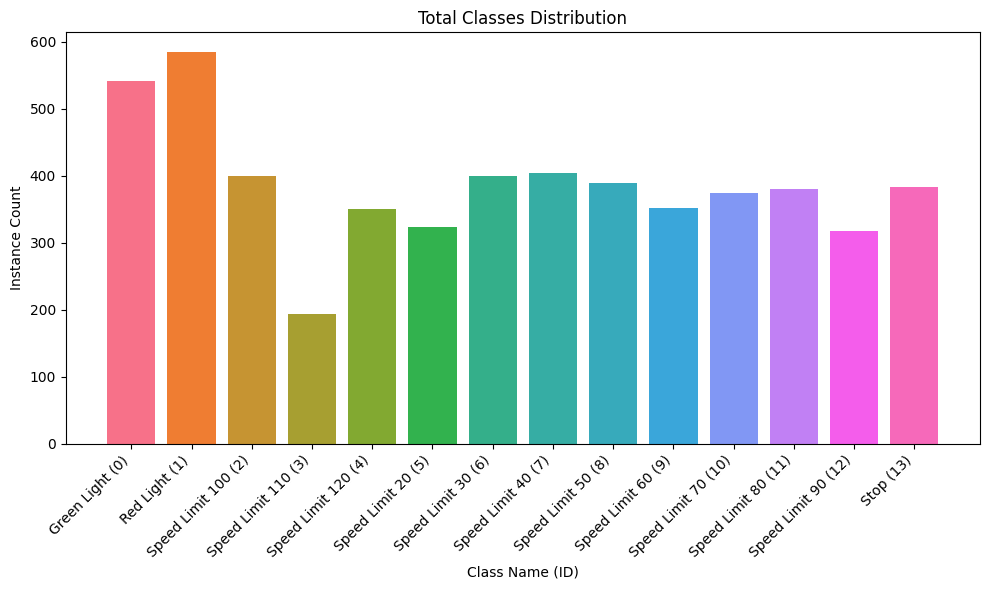

In [ ]:
plot_class_distribution(total,'Total Classes Distribution')

Extra Augmentation for a specific class

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(scale_limit=0.2, rotate_limit=45, p=0.5)
], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))


In [ ]:
# Function_7: augmmentation on a specific class
def augment_images_with_class_id(images_path, labels_path, output_image_path, output_label_path, class_id):
    # List to hold the label files that contain only the specified class ID
    class_images = []

    # Iterate through label files
    for label_file in os.listdir(labels_path):
        if label_file.endswith('.txt'):
            file_path = os.path.join(labels_path, label_file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                # Check if the label file contains only the target class_id
                class_ids_in_image = {int(line.split()[0]) for line in lines}
                if len(class_ids_in_image) == 1 and class_id in class_ids_in_image:
                    class_images.append(label_file)

    # Process each image that matches the criteria
    for label_file in class_images:
        # Construct the corresponding image file path
        label_path = os.path.join(labels_path, label_file)
        image_file = label_file.replace('.txt', '.jpg')  # Assuming image extension is .jpg
        image_path = os.path.join(images_path, image_file)

        # Load image
        image = cv2.imread(image_path)

        # Load bounding box coordinates and class ids
        bboxes = []
        category_ids = []

        with open(label_path, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                bboxes.append([x_center, y_center, width, height])
                category_ids.append(int(class_id))

        # Apply the augmentation
        augmented = transform(image=image, bboxes=bboxes, category_ids=category_ids)

        # Create new file names with 'new' suffix
        new_image_name = os.path.splitext(image_file)[0] + '_new.jpg'
        new_label_name = os.path.splitext(label_file)[0] + '_new.txt'

        # Save the new augmented image
        new_image_path = os.path.join(output_image_path, new_image_name)
        cv2.imwrite(new_image_path, augmented['image'])

        # Save the new bounding boxes
        new_label_path = os.path.join(output_label_path, new_label_name)
        with open(new_label_path, 'w') as f:
            for bbox, class_id in zip(augmented['bboxes'], augmented['category_ids']):
                f.write(f"{class_id} {' '.join(map(str, bbox))}\n")

    print(f"Augmented {len(class_images)} images containing class {class_id} and saved with 'new' suffix.")

In [ ]:
class_id = 3
augment_images_with_class_id(train_images_path, train_labels_path, augmented_images_path, augmented_labels_path, class_id)

Augmented 70 images containing class 3 and saved with 'new' suffix.


In [ ]:
aug_instances = count_class_instances_in_dataset(augmented_labels_path)
aug_instances

{0: 0,
 1: 0,
 2: 133,
 3: 192,
 4: 98,
 5: 49,
 6: 66,
 7: 169,
 8: 107,
 9: 51,
 10: 56,
 11: 57,
 12: 149,
 13: 99}

# ***Total Dataset***

In [ ]:
# Paths of total data
total_images_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/total images'
total_labels_path = '/content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/total labels'

### **Internal Documentation for Copying Training and Augmented Data**

This code defines a function that copies original and augmented images and their corresponding label files into designated total directories. This is useful for consolidating datasets before training a model.

---

### **Function 7: `copy_images_and_labels_to_total(images_path, labels_path, aug_images_path, aug_labels_path, total_images_path, total_labels_path)`**

This function is responsible for copying both original and augmented images and labels into specified total directories.

- **Parameters:**
  - `images_path`: Path to the directory containing the original training images.
  - `labels_path`: Path to the directory containing the original training labels.
  - `aug_images_path`: Path to the directory containing the augmented images.
  - `aug_labels_path`: Path to the directory containing the augmented labels.
  - `total_images_path`: Path to the directory where all images (original and augmented) will be copied.
  - `total_labels_path`: Path to the directory where all labels (original and augmented) will be copied.

- **Internal Function: `copy_files(source_folder, destination_folder)`**
  - This nested function copies all files from the `source_folder` to the `destination_folder`.
  - **Parameters:**
    - `source_folder`: The directory from which to copy files.
    - `destination_folder`: The directory to which files will be copied.
  - The function iterates through all files in the source folder, checks if each file is indeed a file (not a directory), and copies it to the destination folder using `shutil.copy()`.

- **Workflow:**
  1. The function first copies all original images and their corresponding labels to the total directories.
  2. Then, it copies all augmented images and labels to the same total directories.
  3. A confirmation message is printed upon completion of the copying process.

- **Code:**


In [ ]:
# Function_7: copy train and augmented data and put them together
def copy_images_and_labels_to_total(images_path, labels_path, aug_images_path, aug_labels_path, total_images_path, total_labels_path):
    def copy_files(source_folder, destination_folder):
        for file_name in os.listdir(source_folder):
            source_file = os.path.join(source_folder, file_name)
            dest_file = os.path.join(destination_folder, file_name)
            if os.path.isfile(source_file):
                shutil.copy(source_file, dest_file)

    # Copy original images and labels to total folders
    copy_files(images_path, total_images_path)
    copy_files(labels_path, total_labels_path)

    # Copy augmented images and labels to total folders
    copy_files(aug_images_path, total_images_path)
    copy_files(aug_labels_path, total_labels_path)

    print(f"All files copied to {total_images_path} and {total_labels_path}")

In [ ]:
copy_images_and_labels_to_total(train_images_path, train_labels_path, augmented_images_path, augmented_labels_path, total_images_path, total_labels_path)

All files copied to /content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/total images and /content/drive/MyDrive/Datasets/Dataset of Graduation Project/dataset/train/total labels


In [ ]:
total_instances = count_class_instances_in_dataset(total_labels_path)
total_instances

{0: 515,
 1: 548,
 2: 400,
 3: 286,
 4: 346,
 5: 259,
 6: 399,
 7: 404,
 8: 382,
 9: 344,
 10: 369,
 11: 377,
 12: 308,
 13: 381}

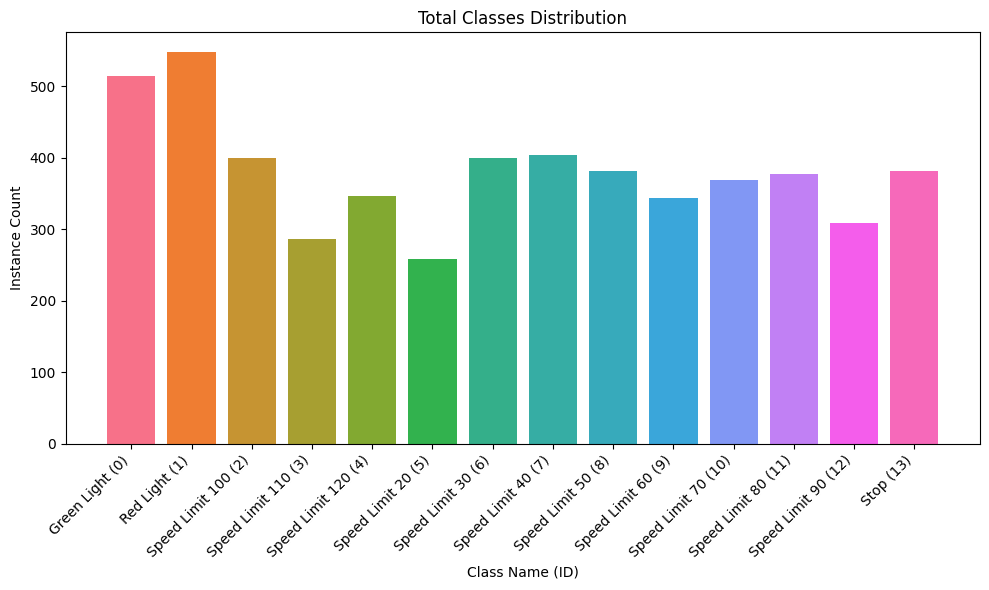

In [ ]:
plot_class_distribution(total_instances,'Total Classes Distribution')

# ***Duplication***

### **Internal Documentation for Image Hashing Function**

This code defines a function that calculates the hash of an image file using the MD5 hashing algorithm. This can be useful for verifying the integrity of image files or detecting duplicates in a dataset.

---

### **Function 7: `hash_image(image_path)`**

This function computes the MD5 hash of an image file specified by its file path.

- **Parameters:**
  - `image_path`: A string representing the path to the image file for which the hash is to be computed.

- **Returns:**
  - A hexadecimal string representing the MD5 hash of the image file.

- **Workflow:**
  1. The function initializes an MD5 hash object using `hashlib.md5()`.
  2. It opens the specified image file in binary read mode (`'rb'`).
  3. The content of the image file is read into a buffer.
  4. The buffer is used to update the hash object.
  5. Finally, the hexadecimal digest of the hash is returned.

- **Code:**
  


In [ ]:
# Function_7: get hash of each image
def hash_image(image_path):
    hasher = hashlib.md5()
    with open(image_path, 'rb') as img_file:
        buf = img_file.read()
        hasher.update(buf)
    return hasher.hexdigest()


### **Function 8: `check_for_identical_images(images_folder)`**

This function scans a folder containing images and identifies any duplicates based on their hash values.

- **Parameters:**
  - `images_folder`: A string representing the path to the folder containing images to be checked for duplication.

- **Returns:**
  - A list of tuples, where each tuple contains the filenames of the duplicate images (the first element is the original image filename, and the second element is the duplicate image filename).

- **Workflow:**
  1. The function initializes an empty dictionary, `image_hashes`, to store image hashes and their corresponding filenames.
  2. It initializes an empty list, `duplicates`, to store pairs of filenames for any identified duplicates.
  3. The function iterates over all files in the specified `images_folder`.
  4. For each file, it checks if it is a valid file (not a directory).
  5. It calculates the hash of the image using the `hash_image()` function.
  6. If the hash already exists in the `image_hashes` dictionary, the image is considered a duplicate, and both the original and duplicate filenames are added to the `duplicates` list.
  7. If the hash does not exist, the hash and the filename are stored in the `image_hashes` dictionary.
  8. After checking all images, a message is printed to indicate whether duplicates were found.
  9. The function returns the list of duplicate image pairs.

- **Code:**



In [ ]:
# Function_8: check duplication based on hash of each image
def check_for_identical_images(images_folder):
    image_hashes = {}
    duplicates = []

    # Iterate over the images in the folder
    for image_file in os.listdir(images_folder):
        image_path = os.path.join(images_folder, image_file)
        if os.path.isfile(image_path):
            # Generate hash for the current image
            image_hash = hash_image(image_path)

            # Check if the hash already exists
            if image_hash in image_hashes:
                # If hash exists, this image is a duplicate
                duplicates.append((image_hashes[image_hash], image_file))
            else:
                # Store the hash with the corresponding file name
                image_hashes[image_hash] = image_file

    if duplicates:
        print("Identical images found")

    else:
        print("No identical images found.")

    return duplicates

In [ ]:
duplicates = check_for_identical_images(total_images_path)

No identical images found.
